In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from htrace import Parse
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
%config InlineBackend.figure_formats = ['svg']
# sns.set_style("whitegrid")
from util import delay
import math


In [2]:
data_path={
    'dfsioe_read': 'ndata/dfsioe_r/',
    'dfsioe_write': 'ndata/dfsioe_w/',
    'terasort': 'ndata/terasort/',
    'wordcount': 'ndata/wordcount/',
    'kmeans': 'ndata/kmeans/',
    'pagerank': 'ndata/pagerank/'
}
samplers = ['a', 'l', 't', 'p0.1', 'p0.01']

In [3]:
def merge_info(bench, samplers):
    path = data_path[bench]
    data = pd.read_csv(path+'res.csv')
    another = delay(path, samplers)
    data['bench'] = bench
    data['time'] = [math.log(a) for a in another['time']]
    data['ctime'] = [a * 100 for a in another['ctime']]
    data['through'] = another['through']
    data['cthrough'] = another['cthrough']
    data['filesize'] = data['size'].apply(lambda x: x/(2**20))
    data.drop(columns=['size'], inplace=True)
    
    data.drop(['Unnamed: 0'], axis=1, inplace=True)
    data.index = ['always', 'bump', 'tbuck', 'p0.1', 'p0.01']
    data = data.reindex(index = ['always', 'p0.01', 'p0.1', 'bump', 'tbuck'])
    data['node'] = data['node']/data['node']['always'] # 和全采样的相除
    data['tree'] = data['tree']/data['tree']['always'] # 和全采样的相除
    data['filesize'] = (data['filesize']/data['filesize']['always'])*100 # 和全采样的相除
    data['filesize'] = [math.log(d) for d in data['filesize']]
    data['sampler'] = data.index
    return data

## 不同bench的采样器采样指标(图)

In [4]:
temp = [merge_info(k,samplers) for k,v in data_path.items()]

In [5]:
benchs = pd.concat(temp)

In [6]:
# 注意wordcount有问题
benchs = benchs.drop(columns=['sampler'])
benchs['sampler'] = benchs.index

In [7]:
bump = benchs[benchs['sampler']=='bump']

In [8]:
tbuck = benchs[benchs['sampler']=='tbuck']

In [9]:
p = benchs[benchs['sampler']=='p0.1']

In [10]:
# p.describe()

## 新图

In [11]:
bnode = benchs.loc[:, ['node', 'bench', 'sampler']]
btree = benchs.loc[:, ['tree', 'bench', 'sampler']]
ben =  benchs.loc[:, ['en', 'bench', 'sampler']]
bdist = benchs.loc[:, ['dist', 'bench', 'sampler']]
btime = benchs.loc[:, ['ctime','time', 'bench', 'sampler']]
bsize = benchs.loc[:, ['filesize', 'bench', 'sampler']]
# metrics = [bnode, btree, ben, bdis, btime, bszie]

In [ ]:
plt.text()

[Text(0, 0.5, 'time'), Text(0.5, 0, 'time')]

[Text(0, 0.5, 'node'), Text(0.5, 0, '')]

[Text(0, 0.5, 'call tree'), Text(0.5, 0, '')]

[Text(0, 0.5, 'entory'), Text(0.5, 0, '')]

[Text(0, 0.5, 'dist'), Text(0.5, 0, '')]

[Text(0, 0.5, 'size'), Text(0.5, 0, '')]

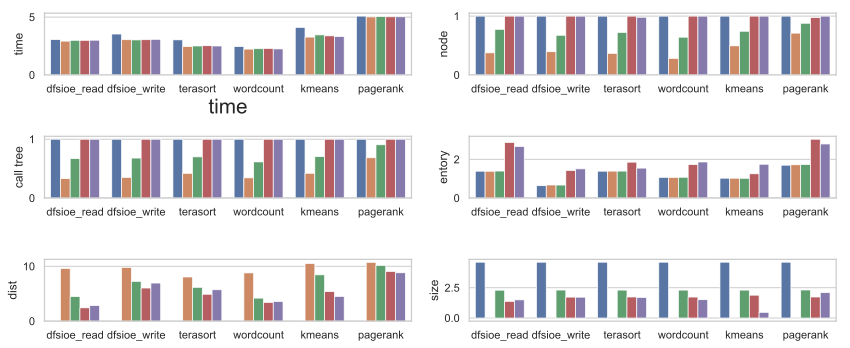

In [22]:
sns.set(style="whitegrid",color_codes=True)
fig, axes = plt.subplots(3,2,figsize = (12, 5))
# time
time_plt = sns.barplot(x=btime.bench, y=btime.time, hue=btime.sampler, ax=axes[0, 0], linewidth=0.7)
time_plt.legend(loc=2, bbox_to_anchor=(1.01,1.0),borderaxespad = 0.)  
time_plt.set(xlabel='time',ylabel='time')
time_plt.legend().remove()
time_plt.xaxis.get_label().set_size('xx-large')
# node
node_plt = sns.barplot(x=bnode.bench, y=bnode.node, hue=bnode.sampler, ax=axes[0, 1], linewidth=0.7)
node_plt.legend().remove()  
node_plt.set(xlabel='',ylabel='node')
# tree
tree_plt = sns.barplot(x=btree.bench, y=btree.tree, hue=btree.sampler, ax=axes[1, 0], linewidth=0.7)
tree_plt.legend().remove()  
tree_plt.set(xlabel='',ylabel='call tree')
# 信息熵
en_plt = sns.barplot(x=ben.bench, y=ben.en, hue=ben.sampler, ax=axes[1, 1], linewidth=0.7)
en_plt.legend().remove() 
en_plt.set(xlabel='',ylabel='entory')
# 相似度
dist_plt = sns.barplot(x=bdist.bench, y=bdist.dist, hue=bdist.sampler, ax=axes[2,0], linewidth=0.7)
dist_plt.legend().remove() 
dist_plt.set(xlabel='',ylabel='dist')

# size
size_plt = sns.barplot(x=bsize.bench, y=bsize.filesize, hue=bsize.sampler, ax=axes[2, 1], linewidth=0.7)
size_plt.legend(loc=2, bbox_to_anchor=(1.01,1.0),borderaxespad = 0.)  
size_plt.set(xlabel='',ylabel='size')
size_plt.legend().remove()

plt.tight_layout()
fig.savefig('../metric_charts.pdf')

Text(0.5, 234.56, '')

In [47]:
# import itertools
# data1 = pd.DataFrame(np.random.rand(17, 3), columns=['A', 'B', 'C']).assign(Location=1)
# data2 = pd.DataFrame(np.random.rand(17, 3) + 0.2, columns=['A', 'B', 'C']).assign(Location=2)
# data3 = pd.DataFrame(np.random.rand(17, 3) + 0.4, columns=['A', 'B', 'C']).assign(Location=3)
# cdf = pd.concat([data1, data2, data3])
# mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Letter'])
# ax = sns.barplot(x="Location", y="value", hue="Letter", data=mdf, errwidth=0)

# num_locations = len(mdf.Location.unique())
# hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
# for i, bar in enumerate(ax.patches):
#     if i % num_locations == 0:
#         hatch = next(hatches)
#     bar.set_hatch(hatch)

# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=True)

# plt.show()

In [48]:
# fig, axes = plt.subplots(figsize = (12, 3))
# # time
# hatches = itertools.cycle(['','///', '\\\\', '..', '+'])
# time_plt = sns.barplot(x=btime.bench, y=btime.time, hue=btime.sampler,linewidth=0.7)
# time_plt.legend(loc=2, bbox_to_anchor=(1.01,1.0),borderaxespad = 0.)  
# for i, bar in enumerate(time_plt.patches):
#     if i % 6 == 0:
#         hatch = next(hatches)
#     bar.set_hatch(hatch)
# #     print(i, hatch)
# legend = axes.legend(loc='upper center', bbox_to_anchor=(1.1,1.0),prop={'size': 16}, title='sampler')

In [15]:
# legend = ax.legend(frameon=True)
# for legend_handle in legend.legendHandles:
#     legend_handle._legmarker.set_markersize(9)